In [93]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
from pathlib import Path
import sys

try:
    ROOT = Path().resolve().parents[1]
    assert (ROOT / "common").exists()
except AssertionError:
    ROOT = next(p for p in Path().resolve().parents if (p / "common").exists())

if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

In [95]:
#print(ROOT)

In [96]:
from common import sensors as sn 
from common import subspace_methods as sm
import em_tools as em

In [97]:
DIST_RATIO = 0.5

In [98]:
Num_sensors1 = 25
Num_emitters1 = 1
sample_size1 = 12

failing_sensors1 = np.arange(5)
gap_ratio1 = 0.5 * np.ones_like(failing_sensors1, dtype=np.float32)

theta1_rad = np.array([0.7]) # Угловые координаты источников (DoA) в радианах
theta1_deg = np.rad2deg(theta1_rad) # Угловые координаты источников (DoA) в градусах
P1 = 0.5 * np.eye(Num_emitters1, dtype=np.float64) # Ковариация сигналов
Q1 = 8.1 * np.eye(Num_sensors1, dtype=np.float64) # Ковариация шумов
A1 = (np.exp(-2j * np.pi * DIST_RATIO * np.arange(Num_sensors1).reshape(-1,1) * 
             np.sin(theta1_rad))) # Матрица векторов направленности
# Генерация сигналов, шумов и наблюдений
S1 = sn.gss(Num_emitters1, sample_size1, P1)
N1 = sn.gss(Num_sensors1, sample_size1, Q1)
X1 = (A1 @ S1.T + N1.T).T
X1_with_mv = sn.MCAR(X1, failing_sensors1, gap_ratio1)
R1 = sn.initial_Cov(X1_with_mv)
MUSIC_theta1 = sm.MUSIC_DoA(R1, Num_emitters1)

In [99]:
MUSIC_theta1

array([0.71558499])

In [100]:
sn.SNR(A1, P1, Q1, metrics = 'avg', scale = 'linear')

np.float64(1.54320987654321)

In [101]:
EM_theta1_rad, EM_P1, lhd_1, lhd_list1, angles_list1 = em.multistart_EM2(X1_with_mv, 
                                                                         Num_emitters1, 
                                                                         Q=Q1,
                                                                         theta_guess=MUSIC_theta1, 
                                                                         num_of_starts=1, 
                                                                         max_iter=50, 
                                                                         rtol=1e-6,
                                                                         reg_coef=1e-5)

0-th start
theta=[0.71558499],P=[[1.18642836e-07-1.98523347e-24j]]
Inital likelihood = -870.4011155592349
Iteration=1
likelihood is -870.4001446036308 on iteration 1.
Iteration=2
likelihood is -870.399127277546 on iteration 2.
Iteration=3
likelihood is -870.3980624556118 on iteration 3.
Iteration=4
likelihood is -870.3969779108653 on iteration 4.
Iteration=5
likelihood is -870.3958874033817 on iteration 5.
Iteration=6
likelihood is -870.3947968591012 on iteration 6.
Iteration=7
likelihood is -870.393708158429 on iteration 7.
Iteration=8
likelihood is -870.3926211803287 on iteration 8.
Iteration=9
likelihood is -870.3915349493876 on iteration 9.
Iteration=10
likelihood is -870.3904481589977 on iteration 10.
Iteration=11
likelihood is -870.3893594352517 on iteration 11.
Iteration=12
likelihood is -870.3882674655171 on iteration 12.
Iteration=13
likelihood is -870.387171120179 on iteration 13.
Iteration=14
likelihood is -870.3860689978995 on iteration 14.
Iteration=15
likelihood is -870.3

In [102]:
EM_theta1_rad, EM_P1

(array([0.69641317]), array([[0.00067493+0.j]]))

In [103]:
em.incomplete_lkhd(X1_with_mv, EM_theta1_rad, EM_P1, Q1), em.incomplete_lkhd(X1_with_mv, theta1_rad, P1, Q1)

(np.float64(-870.329971119446), np.float64(-852.4011191641745))

In [104]:
lhd_list1 = np.array(lhd_list1)
angles_list1 = np.rad2deg(np.array(angles_list1))
x1 = np.arange(len(angles_list1))

In [105]:
Num_sensors2 = 25
Num_emitters2 = 1
sample_size2 = 11

failing_sensors2 = np.arange(8)
gap_ratio2 = 0.5 * np.ones_like(failing_sensors2, dtype=np.float32)

theta2_rad = np.array([0.7]) # Угловые координаты источников (DoA) в радианах
theta2_deg = np.rad2deg(theta2_rad) # Угловые координаты источников (DoA) в градусах
P2 = 0.5 * np.eye(Num_emitters2, dtype=np.float64) # Ковариация сигналов
Q2 = 6.1 * np.eye(Num_sensors2, dtype=np.float64) # Ковариация шумов
A2 = (np.exp(-2j * np.pi * DIST_RATIO * np.arange(Num_sensors2).reshape(-1,1) * 
             np.sin(theta2_rad))) # Матрица векторов направленности
# Генерация сигналов, шумов и наблюдений
S2 = sn.gss(Num_emitters2, sample_size2, P2)
N2 = sn.gss(Num_sensors2, sample_size2, Q2)
X2 = (A2 @ S2.T + N2.T).T
X2_with_mv = sn.MCAR(X2, failing_sensors2, gap_ratio2)
R2 = sn.initial_Cov(X2_with_mv)
MUSIC_theta2 = sm.MUSIC_DoA(R2, Num_emitters2)

In [106]:
MUSIC_theta2

array([0.72431164])

In [107]:
sn.SNR(A2, P2, Q2, metrics = 'avg', scale = 'linear')

np.float64(2.0491803278688523)

In [108]:
EM_theta2_rad, EM_P2, lhd_2, lhd_list2, angles_list2 = em.multistart_EM2(X2_with_mv, 
                                                                         Num_emitters2, 
                                                                         Q=Q2,
                                                                         theta_guess=MUSIC_theta2, 
                                                                         num_of_starts=1, 
                                                                         max_iter=50, 
                                                                         rtol=1e-6,
                                                                         reg_coef=1e-5)

0-th start
theta=[0.72431164],P=[[7.5917774e-08+4.13590306e-24j]]
Inital likelihood = -689.5792611594288
Iteration=1
likelihood is -689.5782882517211 on iteration 1.
Iteration=2
likelihood is -689.5772195160845 on iteration 2.
Iteration=3
likelihood is -689.5760798680287 on iteration 3.
Iteration=4
likelihood is -689.5749062778464 on iteration 4.
Iteration=5
likelihood is -689.5737190295724 on iteration 5.
Iteration=6
likelihood is -689.5725281416911 on iteration 6.
Iteration=7
likelihood is -689.5713377327951 on iteration 7.
Iteration=8
likelihood is -689.5701487402978 on iteration 8.
Iteration=9
likelihood is -689.5689604639026 on iteration 9.
Iteration=10
likelihood is -689.5677714207908 on iteration 10.
Iteration=11
likelihood is -689.5665798461284 on iteration 11.
Iteration=12
likelihood is -689.5653838242063 on iteration 12.
Iteration=13
likelihood is -689.5641815101164 on iteration 13.
Iteration=14
likelihood is -689.5629710807883 on iteration 14.
Iteration=15
likelihood is -689

In [109]:
EM_theta2_rad, EM_P2

(array([0.70077812]), array([[0.00081657+0.j]]))

In [110]:
em.incomplete_lkhd(X2_with_mv, EM_theta2_rad, EM_P2, Q2), em.incomplete_lkhd(X2_with_mv, theta2_rad, P2, Q2)

(np.float64(-689.4863561975419), np.float64(-673.6467390084401))

In [111]:
lhd_list2 = np.array(lhd_list2)
angles_list2 = np.rad2deg(np.array(angles_list2))
x2 = np.arange(len(angles_list2))

In [112]:
x_grid = np.arange(1,50,5)

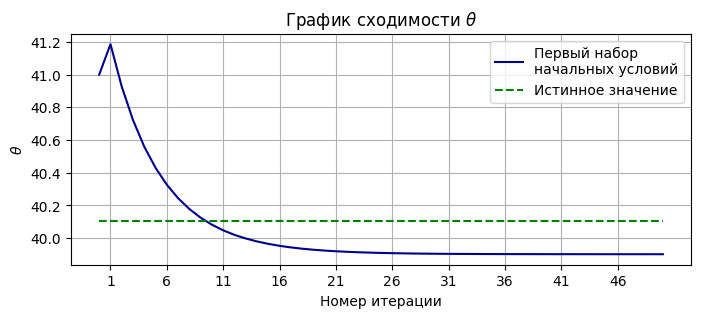

In [113]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График сходимости} \,\,\theta$')
plt.plot(x1, angles_list1,color='darkblue', label=f'Первый набор\nначальных условий')
plt.plot(x1, np.tile(theta1_deg, len(angles_list1)), color='green', label='Истинное значение', linestyle='--')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\theta$')
plt.xticks(x_grid)
plt.legend()
plt.grid()
plt.show()

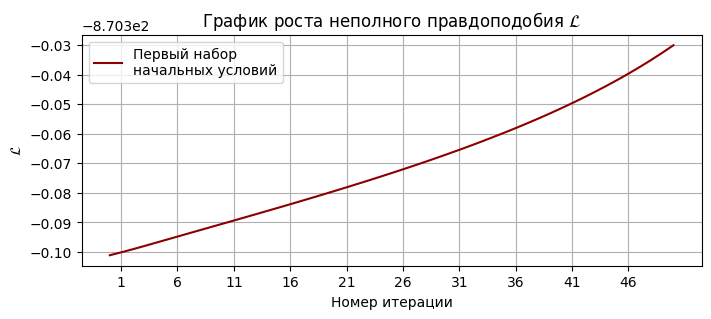

In [114]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График роста неполного правдоподобия} \,\,\mathcal{L}$')
plt.plot(x1, lhd_list1, color='darkred', label=f'Первый набор\nначальных условий')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\mathcal{L}$')
plt.xticks(x_grid)
plt.legend()
plt.grid()
plt.show()

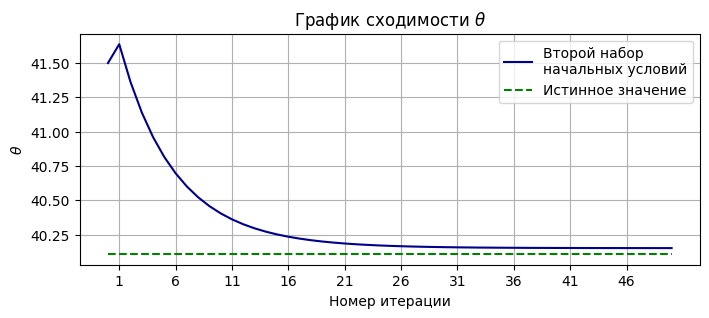

In [115]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График сходимости} \,\,\theta$')
plt.plot(x2, angles_list2,color='darkblue', label=f'Второй набор\nначальных условий')
plt.plot(x2, np.tile(theta2_deg, len(angles_list2)), color='green', label='Истинное значение', linestyle='--')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\theta$')
plt.xticks(x_grid)
plt.legend()
plt.grid()
plt.show()

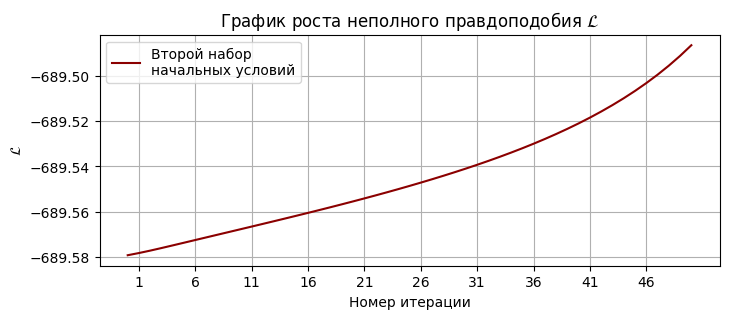

In [116]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График роста неполного правдоподобия} \,\,\mathcal{L}$')
plt.plot(x2, lhd_list2,color='darkred', label=f'Второй набор\nначальных условий')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\mathcal{L}$')
plt.xticks(x_grid)
plt.legend()
plt.grid()
plt.show()